## 简单的模型训练，预测和评估

In [ ]:
# -*- coding: utf-8 -*-

In [ ]:
from font import set_chinese_font_for_seaborn
set_chinese_font_for_seaborn()

✓ 已设置 Seaborn 字体为: Arial Unicode MS


In [ ]:
import pandas as pd

## 数据可视化

In [ ]:
df_ads = pd.read_csv('data.csv')
df_ads.head(10)

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401
5,1541,1541.0,7,5,220002
6,827,NaN,5,7,107503
7,866,686.0,5,9,110504
8,1314,1300.0,8,5,229461
9,1431,1099.0,6,5,165004


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

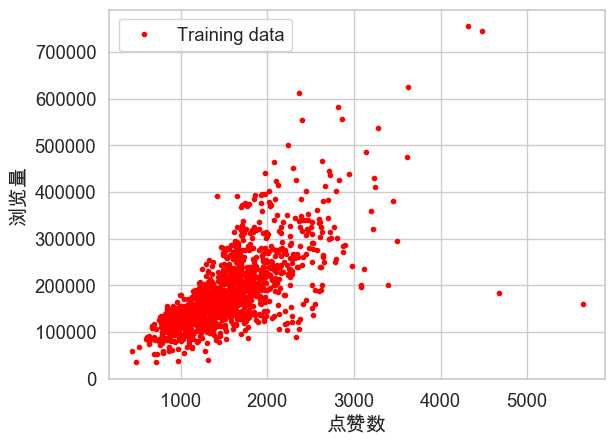

In [ ]:
plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='Training data') # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

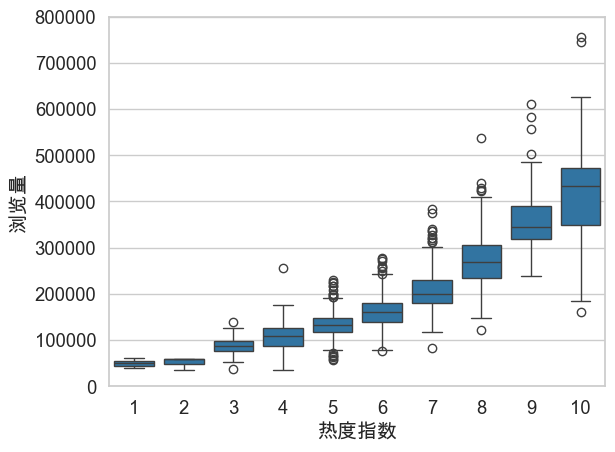

In [ ]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标

## 数据清洗

In [ ]:
df_ads.isna().sum()

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [ ]:
df_ads = df_ads.dropna()

## 特征工程
> 主要就是对数据进行降维处理，并且还不能影响数据的原始意义，比如身体状况需要身高和体重，那么我们用BMI
> 就可以用计算过后weight/height的值在丢入模型进行训练，这样就降低了数据的维度

### 构建特征集和标签集
> 特征就是所收集的各个数据点，是要输入机器学习模型的变量。而标签是要预测、判断或者分类的内容。
> 对于所有监督学习算法，我们都需要向模型中输入“特征集”和“标签集”这两组数据。
> 因此，在开始机器学习的模型搭建之前，我们需要先构建一个特征数据集和一个标签数据集。

> 具体的构建过程也很简单，我们只要从原始数据集删除我们不需要的数据就行了。
> 在这个项目中，特征是点赞数、转发数、热度指数和文章评级，所以只需要从原始数据集中删除“浏览量”就行了。

### 构建特征集
> 在这个项目中，特征是点赞数、转发数、热度指数和文章评级，所以只需要从原始数据集中删除“浏览量”就行了。
> 因为浏览量是我们要预测的数值

In [ ]:
X = df_ads.drop(['浏览量'], axis=1)
X.head(5)

# 使用均值补值
# df_ads['转发数'].fillna(df_ads['转发数'].mean(), inplace=True) # 用均值补值
# 面对空缺的数据，可以采用默认值、均值、中位值等方式填充，有条件的话，可以和业务方沟通，要求补全空缺数据

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


### 构建标签集
> 而标签是我们想要预测的浏览量，因此，我们在标签数据集中只保留“浏览量”字段

In [ ]:
y = df_ads.浏览量
y.head()

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

## 拆分训练集、验证集和测试集
> 用机器学习工具包 scikit-learn 里的数据集拆分工具 train_test_split 来完成：

In [ ]:
#将数据集进行80%（训练集）和20%（验证集）的分割
#特征训练集（X_train）
#特征测试集（X_test）
#标签训练集（y_train）
#标签测试集（y_test）

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# scikit-learn，简称 sklearn
# 开源机器学习工具库

## 导入线性回归算法模型
> 模型的参数有两种：内部参数和外部参数。
内部参数是属于算法本身的一部分，不用我们人工来确定，刚才提到的权重 w 和截距 b，都是线性回归模型的内部参数；
而外部参数也叫做超参数，它们的值是在创建模型时由我们自己设定的。
对于 LinearRegression 模型来讲，它的外部参数主要包括两个布尔值：
> fit_intercept ，默认值为 True，代表是否计算模型的截距。
> normalize，默认值为 False，代表是否对特征 X 在回归之前做规范化。

In [ ]:
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
linereg_model = LinearRegression() # 使用线性回归算法创建模型

## 训练模型
> 训练模型就是用训练集中的特征变量和已知标签，根据当前样本的损失大小来逐渐拟合函数，确定最优的内部参数，最后完成模型。

In [ ]:
linereg_model.fit(X_train, y_train) # 用训练集数据，训练机器，拟合函数，确定内部参数

LinearRegression()

## 模型的评估和优化

In [ ]:
y_pred = linereg_model.predict(X_test) #预测测试集的Y值

In [ ]:
df_ads_pred = X_test.copy() # 测试集特征数据
df_ads_pred['浏览量真值'] = y_test # 测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred # 测试集标签预测值
df_ads_pred #显示数据

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
1074,1709,970.0,6,5,130003,181499.180492
404,1440,1440.0,4,4,118005,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941
1317,832,832.0,6,6,105504,137486.350468
145,923,876.0,5,5,119501,110710.382414
...,...,...,...,...,...,...
420,1790,873.0,7,5,193004,211755.243385
1338,2622,1463.0,8,5,325002,301982.291922
542,1342,1372.0,6,5,161502,177814.080182
311,1663,1364.0,4,6,256002,136460.539585


### 看看模型长啥样

In [ ]:
print('当前模型的4个特征的权重分别是: ', linereg_model.coef_)
print('当前模型的截距（偏置）是: ', linereg_model.intercept_)

当前模型的4个特征的权重分别是:  [   48.08395224    34.73062229 29730.13312489  2949.62196343]
当前模型的截距（偏置）是:  -127493.90606857196


In [ ]:
# 也就是说当前线性模型的公式如下：
# yy=48.08x1​（点赞）+34.73x2​（转发）+29730.13x3​（热度）+2949.62x4​（评级）−127493.91

### 给出当前这个模型的评估分数

In [ ]:
print("线性回归预测评分：", linereg_model.score(X_test, y_test)) # 评估模型
# print("线性回归预测评分：", linereg_model.score(X_test, y_pred)) # 评估模型

线性回归预测评分： 0.740552064611524
线性回归预测评分： 1.0


### 看看预测的数据分布

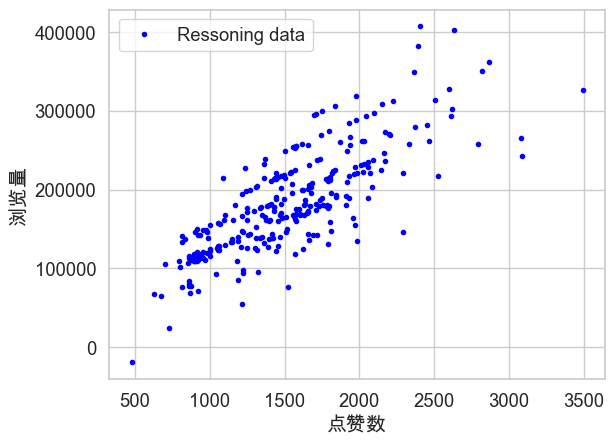

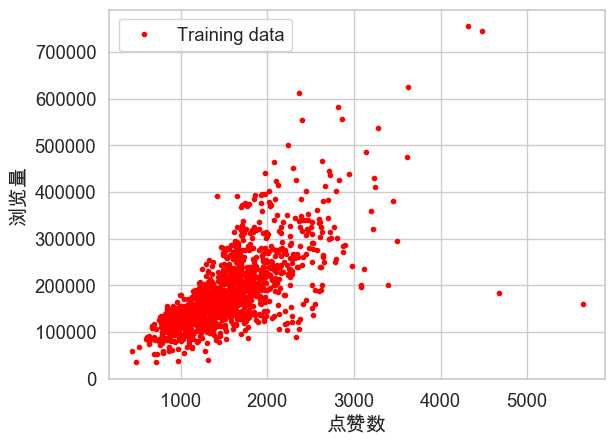

In [ ]:
plt.plot(df_ads_pred['点赞数'],df_ads_pred['浏览量预测值'],'b.', label='Ressoning data') # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='Training data') # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！